# Deutsch's Algorithm

### Reference Barnett 7.2. Nielsen 1.4.3.

In [1]:
# imports for quiskit
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit.circuit import Gate
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram



**Classical version of the problem:** Given an unknown function of a single bit, determine if the function is balanced or unbalanced. The balanced functions are f(x) = x and f(x) = not(x). The unbalanced functions are f(x) = 0 and f(x) = 1. Answering this question requires evaluating f(x) twice, with inputs zero and one.

**Quantum version of the functions:** The unbalanced functions are not unitary, so the quantum f(x) requires an ancillary input qbit and a second output. I will use the standard arranement as described in Barnett 7.2. This is a two qbit circuit, with the input x |0> or |1> on the upper qbit, and the lower ancillary qbit |b> assumed to be set to |0>. The lower output qbit will have |b$\oplus$f(x)>. 

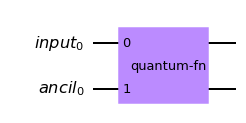

In [2]:
fngate = Gate(name='quantum-fn', num_qubits=2, params=[])
inputbit = QuantumRegister(1, 'input')
ancil = QuantumRegister(1, 'ancil')
qFn = QuantumCircuit(inputbit, ancil, name='quantum-fn')
qFn.append(fngate, [inputbit, ancil])
qFn.draw(output='mpl')

Deutch's solution to this problem is to use the circuit below. The quantum function gives the expected results in the computational basis, with the lower qbit in the |0> state. Passing two different superposed states as inputs causes a measurable phase shift in the upper qbit when the quantum function contains a CNOT gate.

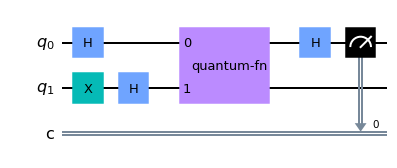

In [3]:
# Make a deutsch circuit for an oracle
def make_deutsch(oracle):
    ''' embed an oracle in the Deutsch algorithm circuit'''
    deutsch = QuantumCircuit(2, 1)
    deutsch.x(1)
    deutsch.h(0)
    deutsch.h(1)
    deutsch.append(oracle, [0, 1])
    deutsch.h(0)
    deutsch.measure([0], [0])
    return deutsch

deutsch = make_deutsch(qFn)
deutsch.draw(output='mpl')

      Balanced: f(x) = not(x)


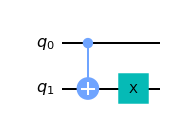

In [4]:
# f(x) = not(x) 
fnot = QuantumCircuit(2, name='fn-not')
fnot.cx(0, 1)
fnot.x(1)
print('      Balanced: f(x) = not(x)')
fnot.draw(output='mpl')

      Balanced: f(x) = x


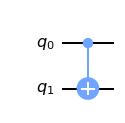

In [5]:
# f(x) = x
fid = QuantumCircuit(2, name='fn-ident')
fid.cx(0, 1)
print('      Balanced: f(x) = x')
fid.draw(output='mpl')

      Unbalanced: f(x) = 0


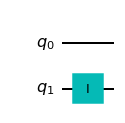

In [6]:
# f(x) = 0
fzero = QuantumCircuit(2, name='fn-zero')
fzero.i(1)
print('      Unbalanced: f(x) = 0')
fzero.draw(output='mpl')

      Unbalanced: f(x) = 1


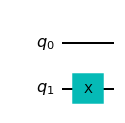

In [7]:
# f(x) = 1
fone = QuantumCircuit(2, name = 'fn-one')
fone.x(1)
print('      Unbalanced: f(x) = 1')
fone.draw(output='mpl')

The Deutsch algorithm makes one run through the unknown quantum_fn circuit. Here are the results, which should be '1' if balanced and '0' if unbalanaced. Since the unbalanced cases pass the upper qbit to the output unchanged, it is obvious that the result of the measurement for unbalanced functions is zero.

      Balanced f(x) = Not(x). 100 run results: {'1': 100}


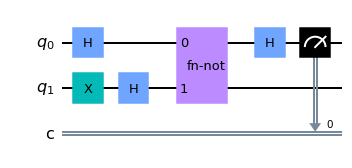

In [8]:
deutsch = make_deutsch(fnot)
simulator = QasmSimulator()
compiled_circuit = transpile(deutsch, simulator)
job = simulator.run(compiled_circuit, shots=100)
result = job.result()
counts = result.get_counts(deutsch)
print('      Balanced f(x) = Not(x). 100 run results: ' + str(counts))
deutsch.draw(output='mpl')

      Balanced f(x) = x. 100 run results: {'1': 100}


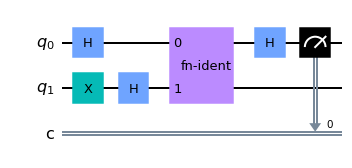

In [9]:
deutsch = make_deutsch(fid)
simulator = QasmSimulator()
compiled_circuit = transpile(deutsch, simulator)
job = simulator.run(compiled_circuit, shots=100)
result = job.result()
counts = result.get_counts(deutsch)
print('      Balanced f(x) = x. 100 run results: ' + str(counts))
deutsch.draw(output='mpl')

      Unbalanced f(x) = 0. 100 run results: {'0': 100}


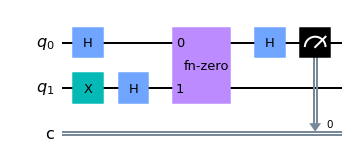

In [10]:
deutsch = make_deutsch(fzero)
simulator = QasmSimulator()
compiled_circuit = transpile(deutsch, simulator)
job = simulator.run(compiled_circuit, shots=100)
result = job.result()
counts = result.get_counts(deutsch)
print('      Unbalanced f(x) = 0. 100 run results: ' + str(counts))
deutsch.draw(output='mpl')

      Unbalanced f(x) = 1. 100 run results: {'0': 100}


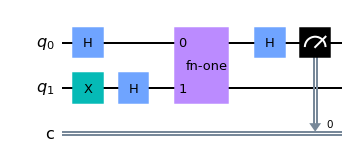

In [11]:
deutsch = make_deutsch(fone)
simulator = QasmSimulator()
compiled_circuit = transpile(deutsch, simulator)
job = simulator.run(compiled_circuit, shots=100)
result = job.result()
counts = result.get_counts(deutsch)
print('      Unbalanced f(x) = 1. 100 run results: ' + str(counts))
deutsch.draw(output='mpl')

The key to this algorithm is understanding how the upper qbit is set to |1> in the balanced states that contain a CNOT gate. I found three explanations. First is the "eqivalent circuits." The Qiskit documentation and several papers on equivala circuits say the surrouding a CNOT gate with hadamard gates rverses the direction of the CNOT. The next two circuits are identical, so in the Deutsch circuit above the |1> on the lower input to the function inverts the upper output.

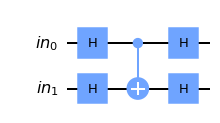

In [12]:
qr = QuantumRegister(2, 'in')
qc = QuantumCircuit(qr)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

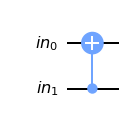

In [13]:
qr = QuantumRegister(2, 'in')
qc = QuantumCircuit(qr)
qc.cx(1, 0)
qc.draw(output='mpl')

The second path to understanding is looking at the linear algebra of the circuit in the computational basis. (I leave out the normalization constants in the following for simplicity). The upper input is |0>, or  $\left(\begin{array}{cc} 1 \\ 0 \end{array}\right)$. The Hadamard operator is  $\left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right)$ *  $\left(\begin{array}{cc} 1 \\ 0 \end{array}\right)$ =  $\left(\begin{array}{cc} 1 \\ 1 \end{array}\right)$. The lower input is $\left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right)$ *  $\left(\begin{array}{cc} 0 \\ 1 \end{array}\right)$ =  $\left(\begin{array}{cc} 1 \\ -1 \end{array}\right)$.

The two qbit function input is $\left(\begin{array}{cc} 1 \\ 1 \end{array}\right) \otimes \left(\begin{array}{cc} 1 \\ -1 \end{array}\right)$. Recall that $\left(\begin{array}{cc} a \\ b \end{array}\right) \otimes \left(\begin{array}{cc} c \\ d \end{array}\right)$ =  $\left(\begin{array}{cc} ac \\ ad \\ bc \\ bd \end{array}\right)$. The CNOT output is$ \left(\begin{array}{cc} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right)$ * $\left(\begin{array}{cc} 1 \\ -1 \\ 1 \\ -1 \end{array}\right)$ = $\left(\begin{array}{cc} 1 \\ -1 \\ -1 \\ 1 \end{array}\right)$

Now we need to factor the output of the cnot gate to get the individual output qbits. The results is $\left(\begin{array}{cc} 1 \\ -1 \end{array}\right) \otimes \left(\begin{array}{cc} 1 \\ -1 \end{array}\right)$. Aplying the hardard gate to the upper qbit gives $\left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right)$ *  $\left(\begin{array}{cc} 1 \\ -1 \end{array}\right)$ =  $\left(\begin{array}{cc} 0 \\ 1 \end{array}\right)$, which is |1>.

The final path to understanding Deutsch is by following the equations in Barnett 7.18 to 7.23 (or Nielsen 1.42 to 1.45). Both books say that the first step is obvious, but I don't see it.